# Waterbomb cell - 5 parameter folding controlled by $\Delta V$

In [1]:
import sympy as sp
sp.init_printing()
import numpy as np

## Upper right corner node

Control parameters $a, b, c$ and angle $\alpha$

In [2]:
a, b, c = sp.symbols('a, b, c', positive=True)
alpha = sp.symbols('alpha', positive=True)
beta = sp.symbols(r'beta')

Position variables to be determined for the above control parameters

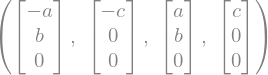

In [3]:
U_ur_0 = sp.Matrix([a, b, 0])
U_ul_0 = sp.Matrix([-a, b, 0])
V_r_0 = sp.Matrix([c, 0, 0])
V_l_0 = sp.Matrix([-c, 0, 0])
U_ul_0, V_l_0, U_ur_0, V_r_0

# Solution based on constant sector angles

In [4]:
x_ur, y_ur, z_ur = sp.symbols(r'x^{\urcorner}, y^{\urcorner}, z^{\urcorner}')
x_ul, y_ul, z_ul = sp.symbols(r'x^{\ulcorner}, y^{\ulcorner}, z^{\ulcorner}')

Node $V^\dashv$ rotates in the $xz$ plane. The control angle $\alpha = 0$ for a flat state, i.e. $z^\dashv(\alpha=0) = 0$
\begin{align}
 V^\dashv = [c \cos(\alpha), c \sin(\alpha) \sin(\beta), c \sin(\alpha) \cos(\beta)]
\end{align}
and the node $V^\vdash$ is defined as 
\begin{align}
 V^\dashv = [c \cos(\alpha), -c \sin(\alpha) \sin(\beta), c \sin(\alpha) \cos(\beta)]
\end{align}

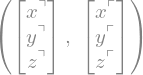

In [5]:
U_ur_1 = sp.Matrix([x_ur, y_ur, z_ur])
U_ul_1 = sp.Matrix([x_ul, y_ul, z_ul])
U_ur_1, U_ul_1

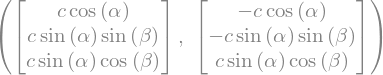

In [6]:
V_r_1 = sp.Matrix([c * sp.cos(alpha), c * sp.sin(alpha) * sp.sin(beta), c * sp.sin(alpha) * sp.cos(beta)])
V_l_1 = sp.Matrix([-c * sp.cos(alpha), -c * sp.sin(alpha) * sp.sin(beta), c * sp.sin(alpha) * sp.cos(beta)])
V_r_1, V_l_1

Positions of $U^\urcorner_0$ and $V^\dashv_0$ 

## Scalar products $OU^\urcorner \cdot OV^\dashv$ and $OU^\ulcorner \cdot OV^\vdash$ 

In [14]:
X_UOV_r_0 = U_ur_0.T * V_r_0
X_VOU_l_0 = U_ul_0.T * V_l_0
X_UOV_r_0, X_VOU_l_0

In [15]:
X_UOV_r_1 = U_ur_1.T * V_r_1
X_VOU_l_1 = U_ul_1.T * V_l_1
X_UOV_r_1, X_VOU_l_1

In [16]:
Eq_UOV_r = sp.Eq( X_UOV_r_0[0], X_UOV_r_1[0])
Eq_UOV_l = sp.Eq( X_VOU_l_0[0], X_VOU_l_1[0])
Eq_UOV_r, Eq_UOV_l

## Scalar product  $U^\urcorner V^\dashv \cdot U^{\urcorner}O$ and $U^\ulcorner V^\vdash \cdot U^{\ulcorner}O$

In [17]:
X_VUO_r_0 = (V_r_0 - U_ur_0).T * (-U_ur_0)
X_VUO_l_0 = (V_l_0 - U_ul_0).T * (-U_ul_0)
X_VUO_r_0, X_VUO_l_0

In [18]:
X_VUO_r_1 = (V_r_1 - U_ur_1).T * (-U_ur_1)
X_VUO_l_1 = (V_l_1 - U_ul_1).T * (-U_ul_1)
X_VUO_r_1, X_VUO_l_1

In [19]:
Eq_VUO_r = sp.Eq( -X_VUO_r_0[0], -X_VUO_r_1[0])
Eq_VUO_l = sp.Eq( -X_VUO_l_0[0], -X_VUO_l_1[0])
Eq_VUO_r, Eq_VUO_l

## Scalar product between $OV^\dashv$ and $V^\dashv U^\urcorner$

In [25]:
X_OVU_r_0 = (-V_r_0).T * (U_ur_0 - V_r_0)
X_OVU_l_0 = (-V_l_0).T * (U_ul_0 - V_l_0)
X_OVU_l_0, X_OVU_r_0

In [27]:
X_OVU_r_1 = (-V_r_1).T * (U_ur_1 - V_r_1)
X_OVU_l_1 = (-V_l_1).T * (U_ul_1 - V_l_1)
X_OVU_l_1, X_OVU_r_1

In [28]:
Eq_OVU_r = sp.Eq( X_OVU_r_0[0], X_OVU_r_1[0])
Eq_OVU_l = sp.Eq( X_OVU_l_0[0], X_OVU_l_1[0])
Eq_OVU_r, Eq_OVU_l

## Scalar product between $OU^\ulcorner$ and $OU^\urcorner$

In [29]:
X_UOU_0 = (U_ul_0).T * (U_ur_0)
X_UOU_0

In [30]:
X_UOU_1 = (U_ul_1).T * (U_ur_1)
X_UOU_1

In [31]:
Eq_UOU = sp.Eq(X_UOU_0[0], X_UOU_1[0])
Eq_UOU

## Solve for $U^\urcorner(x^\urcorner)$ and $U^\ulcorner(x^\ulcorner)$

In [49]:
yz_ur_sol1, yz_ur_sol2 = sp.solve({Eq_UOV_r, Eq_VUO_r}, [y_ur, z_ur])
yz_ul_sol1, yz_ul_sol2 = sp.solve({Eq_UOV_l, Eq_VUO_l}, [y_ul, z_ul])

In [50]:
y_ur_sol, z_ur_sol = yz_ur_sol1
y_ul_sol, z_ul_sol = yz_ul_sol1

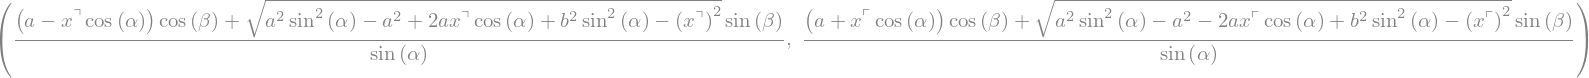

In [51]:
sp.trigsimp(z_ur_sol), sp.trigsimp(z_ul_sol)

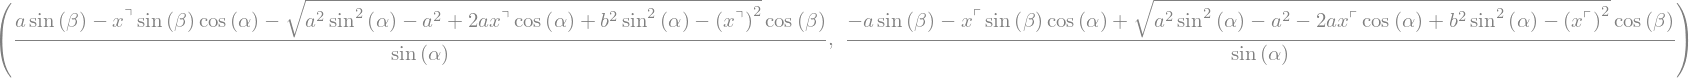

In [52]:
sp.trigsimp(y_ur_sol), sp.trigsimp(y_ul_sol)

In [53]:
subs_yz = {y_ur:y_ur_sol, z_ur:z_ur_sol,
           y_ul:y_ul_sol, z_ul:z_ul_sol}

In [54]:
sp.trigsimp(Eq_OVU_r.subs(subs_yz))

### Solutions $U^\urcorner(x^\urcorner)$ and $U^\ulcorner(x^\ulcorner)$

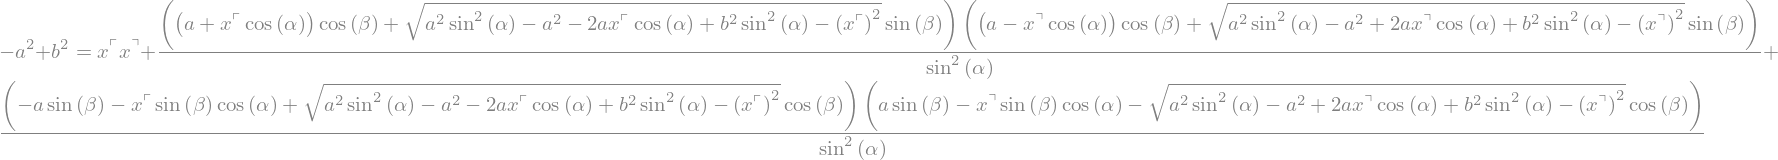

In [59]:
Eq_UOU_x = Eq_UOU.subs(subs_yz)
Eq_UOU_x

This equation has a form
\begin{align}
C = x + \sqrt{Ax} + Bx
\end{align}
To get rid of the square root let it rearranged to
\begin{align}
-\sqrt{Ax}  = -C + x + Bx
\end{align}
to obtain

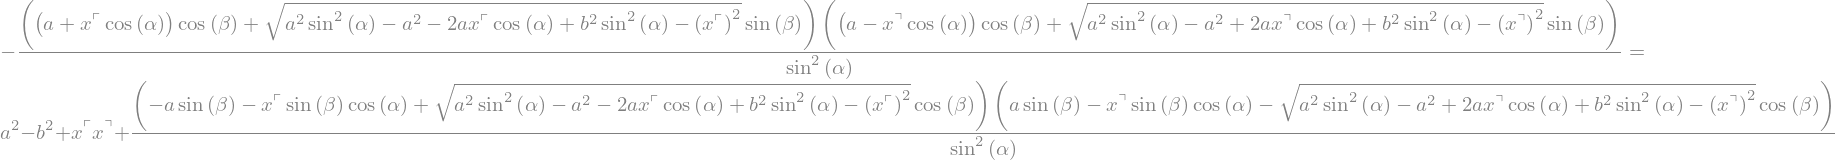

In [58]:
Eq_UOU_x_rearr = sp.Eq( -Eq_UOU_x.args[1].args[1], -Eq_UOU_x.args[0] + Eq_UOU_x.args[1].args[0] + Eq_UOU_x.args[1].args[2] )
Eq_UOU_x_rearr

The square of the left and right hand side renders
\begin{align}
-Ax = (-C + x + Bx)^2 \implies (-C + x + Bx)^2+Ax = 0.
\end{align}
After expanding the terms in the squared paranthesis and collecting terms associated to the individual powers of $x$
we obtain a quadratic equation for $x^\ulcorner$

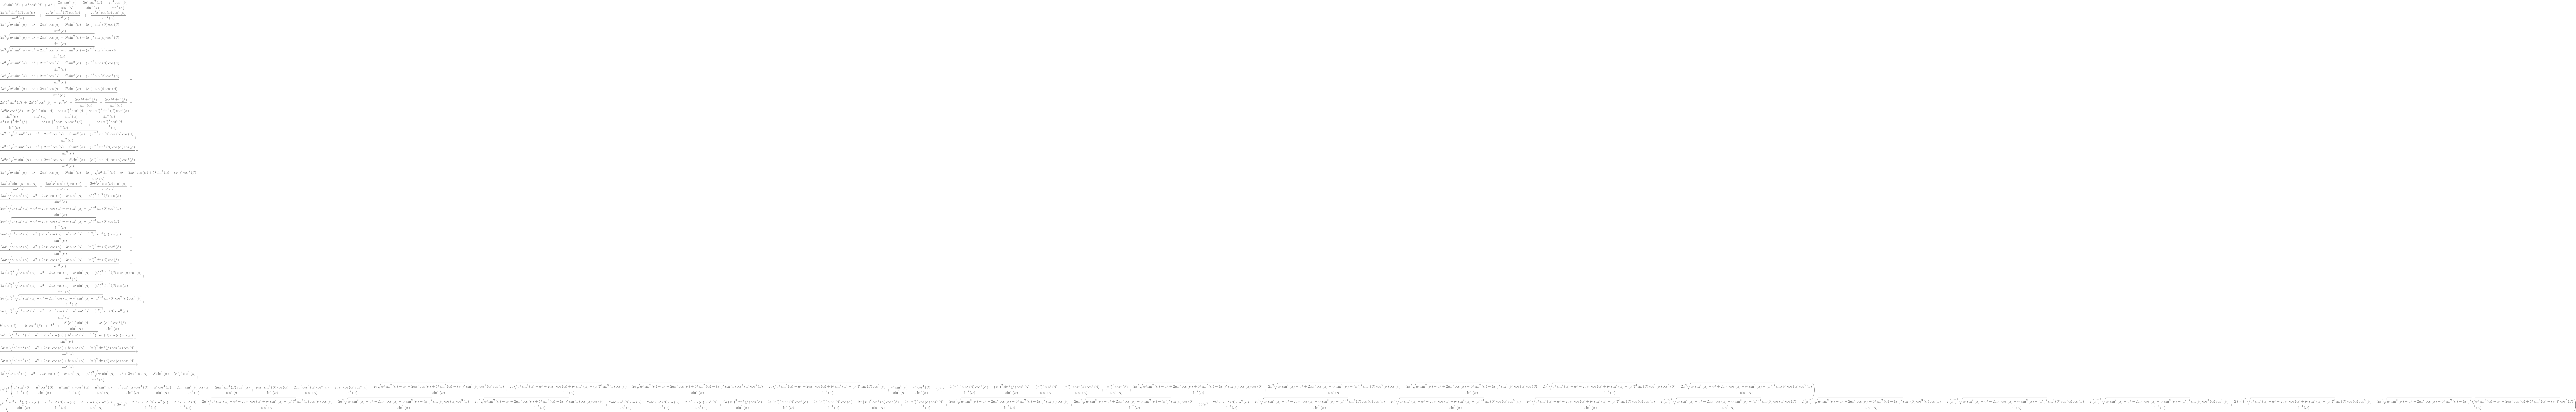

In [26]:
Eq_UOU_x_rhs = Eq_UOU_x_rearr.args[1]**2 - Eq_UOU_x_rearr.args[0]**2
Eq_UOU_x_rhs_collect = sp.collect( sp.expand(Eq_UOU_x_rhs), x_ul )
Eq_UOU_x_rhs_collect

Collection of coefficients $A, B, C$ corresponding to the powers of $x^\ulcorner$, i.e. $A (x^\ulcorner)^2 + B x^\ulcorner + C$
is done using the list comprehension available in Pythin which delivers. For example, 
`[i for i in [2,1,0]]` renders a list `[2,1,0]`. At the place of `i` we apply the `expr.coeff(x_ul,i)` function
delivering the coefficient associated with $(x^\ulcorner)^i$

In [27]:
A_, B_, C_ = [ Eq_UOU_x_rhs_collect.coeff(x_ul,i) for i in [2,1,0]]

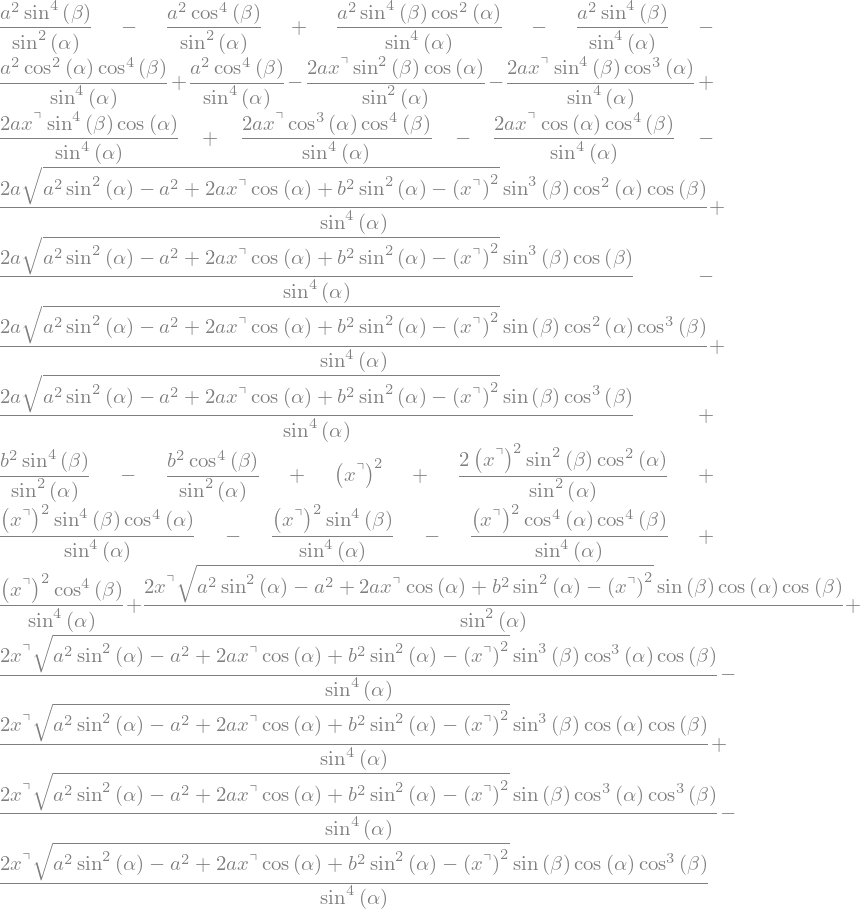

In [28]:
A_

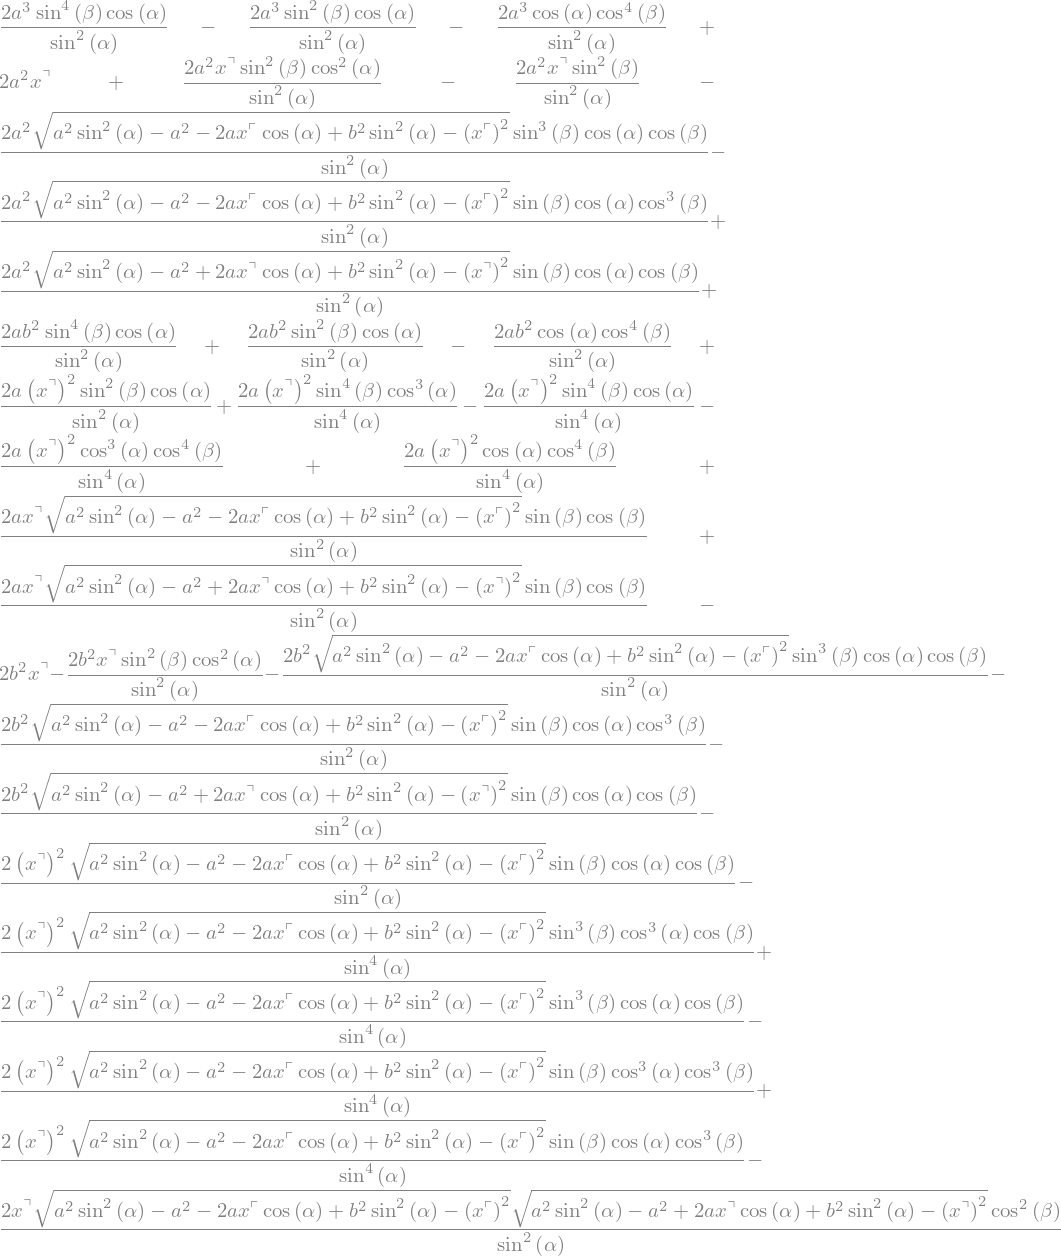

In [29]:
B_

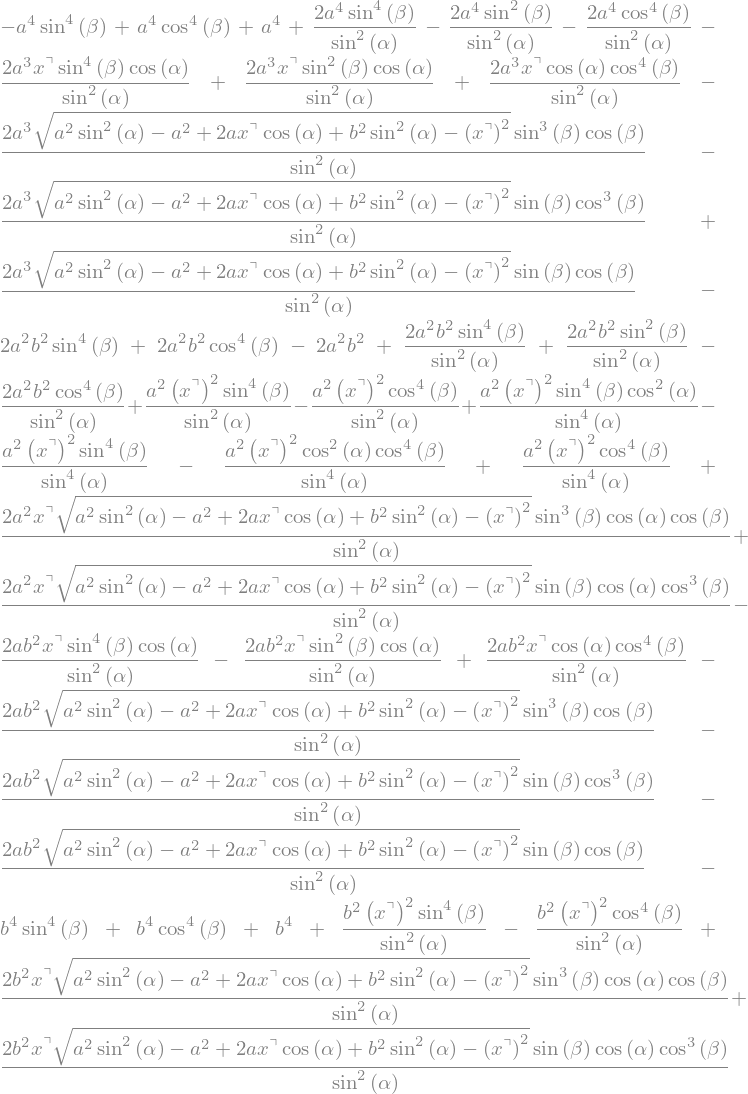

In [30]:
C_

Prepare the two solutions of a quadratic equation as an expression with $A, B, C$ as parameters

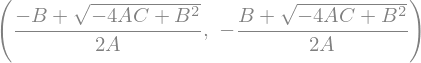

In [31]:
A, B, C = sp.symbols('A, B, C')
x_ul_sol1, x_ul_sol2 = sp.solve( A * x_ul**2 + B * x_ul + C, x_ul )
x_ul_sol1, x_ul_sol2

Substitute for the parameters $A, B, C$ to obtain the solution.

**Remark**: the second solution is relevant for the mountain/valley distribution
considered in the waterbomb shells. Nevertheless, it would be interesting to 
combine the two solutions to get a complete kinematics of the cell regardlessly
of the mountain/valley distribution within the cell.

In [32]:
x_ul_sol2_ = x_ul_sol2.subs({A: A_, B: B_, C: C_})

Verify that the condition for constant scalar product $UOU$ is fulfilled

In [34]:
#sp.simplify(Eq_UOU_x_rhs_collect.subs(x_ul, x_ul_sol2_))

**Remark:** Solution `x_ul_sol1_` does not satisfy the constant sector angle condition. This is due to the square applied at both sides of the condition that allows for a second solution with alternating signs on left and right hand side.

Further, verify that for $x^\urcorner = a$ and $\gamma = 0$ (fully folded state), $x^\ulcorner = -a$

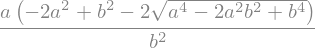

In [37]:
sp.simplify(x_ul_sol2_.subs(x_ur,a).subs(gamma,0))

In [39]:
sp.limit(x_ul_sol2_.subs(x_ur,a).subs(b,a), gamma, sp.pi/2)

**TODO**: Consider the control of folding using a dimensionless parameter $\eta, \zeta$ representing the 
    unfolded and folded states instead of fold angle $\gamma$. 

### Find a solution for $\gamma = \pi/3$

In [30]:
y_ul_sol1_pi3, y_ul_sol2_pi3 = sp.solve(Eq_UOU_x.subs(gamma,sp.pi/3), x_ul)

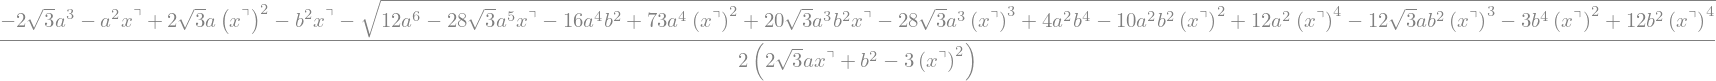

In [31]:
y_ul_sol1_pi3

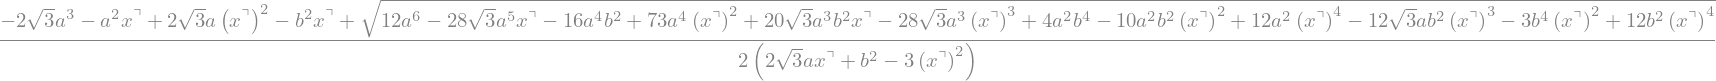

In [32]:
y_ul_sol2_pi3

In [33]:
x_ul_sol1_pi6, x_ul_sol2_pi6 = sp.solve( Eq_UOU_x.subs( gamma, sp.pi/6 ), x_ul)

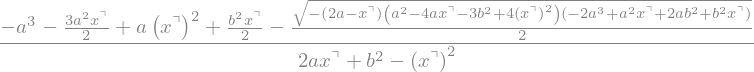

In [34]:
x_ul_sol1_pi6

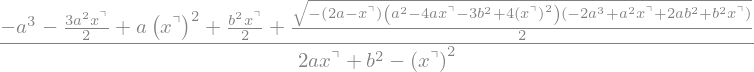

In [35]:
x_ul_sol2_pi6

## Solve for $U^\urcorner(y^\urcorner)$ and $U^\ulcorner(y^\ulcorner)$

In [40]:
xz_ur_sol1, yz_ur_sol2 = sp.solve({Eq_UOV_r, Eq_VUO_r}, [x_ur, z_ur])
xz_ul_sol1, yz_ul_sol2 = sp.solve({Eq_UOV_l, Eq_VUO_l}, [x_ul, z_ul])

first solution for $x^\urcorner$ and $z^\urcorner$

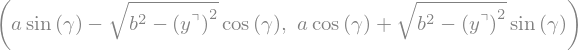

In [41]:
xz_ur_sol1

In [42]:
x_ur_sol, z_ur_sol = xz_ur_sol1

first solution for $x^\ulcorner$ and $z^\ulcorner$

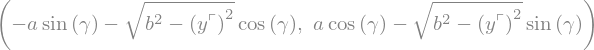

In [39]:
xz_ul_sol1

In [40]:
x_ul_sol, z_ul_sol = xz_ul_sol1

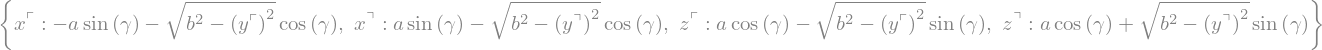

In [41]:
subs_xz = {x_ur:x_ur_sol, z_ur:z_ur_sol,
           x_ul:x_ul_sol, z_ul:z_ul_sol}
subs_xz

### Solutions $U^\urcorner(y^\urcorner)$ and $U^\ulcorner(y^\ulcorner)$

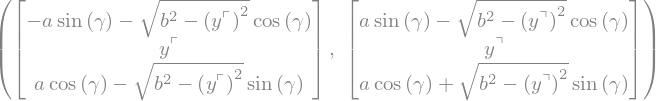

In [42]:
U_ur_y = U_ur_1.subs(subs_xz)
U_ul_y = U_ul_1.subs(subs_xz)
U_ul_y, U_ur_y

Verify the unfolded - flat state with $\gamma = \frac{\pi}{2}$

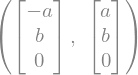

In [43]:
U_ul_y.subs(gamma,sp.pi/2).subs(y_ul,b), U_ur_y.subs(gamma, sp.pi/2).subs(y_ur,b)

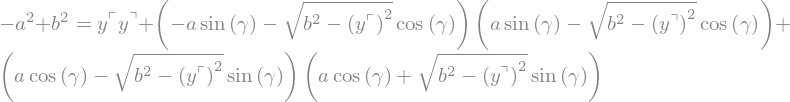

In [44]:
Eq_UOU_y = Eq_UOU.subs(subs_xz)
Eq_UOU_y

In [45]:
dy_ul, dy_ur = sp.symbols(r'\Delta{y}^\ulcorner, \Delta{y}^\urcorner')
dy_ul, dy_ur

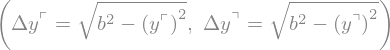

In [46]:
dy_ul_, dy_ur_ = [sp.Eq(dy_u, sp.sqrt( b**2 - y_u**2 )) for dy_u, y_u in zip([dy_ul, dy_ur],[y_ul, y_ur])]
dy_ul_, dy_ur_

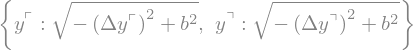

In [47]:
subs_y_u = {y_u: sp.solve(dy_u_, y_u)[1] for dy_u_, y_u in zip([dy_ul_, dy_ur_],[y_ul, y_ur])}
subs_y_u

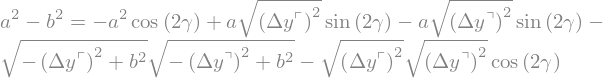

In [48]:
sp.simplify(Eq_UOU_y.subs(subs_y_u))

This equation can be solved for $y^\urcorner$ in `maple`. However it is very long.
Attempting further simplifications.

## Solve for $U^\urcorner(z^\urcorner)$ and $U^\ulcorner(z^\ulcorner)$

In [49]:
xy_ur_sol1, xy_ur_sol2 = sp.solve({Eq_UOV_r, Eq_VUO_r}, [x_ur, y_ur])
xy_ul_sol1, xy_ul_sol2 = sp.solve({Eq_UOV_l, Eq_VUO_l}, [x_ul, y_ul])

In [50]:
x_ur_sol, y_ur_sol = xy_ur_sol1
x_ul_sol, y_ul_sol = xy_ul_sol1

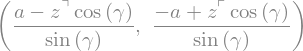

In [51]:
x_ur_sol, x_ul_sol

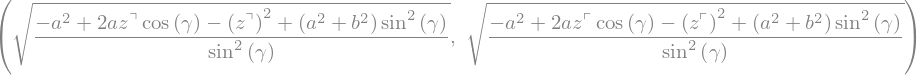

In [52]:
y_ur_sol, y_ul_sol

In [53]:
subs_xy = {x_ur:x_ur_sol, y_ur:y_ur_sol,
           x_ul:x_ul_sol, y_ul:y_ul_sol}

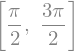

In [54]:
Eq_UOU_z = Eq_UOU.subs(subs_xy)
sp.solve(Eq_UOU_z.subs(z_ul,0).subs(z_ur,0), gamma)

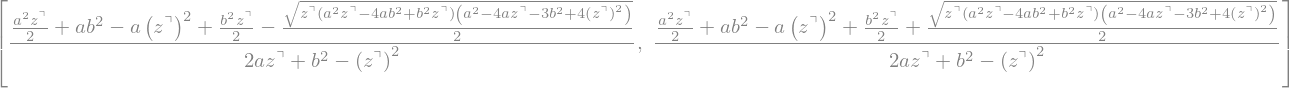

In [55]:
sp.solve(Eq_UOU_z.subs(gamma,sp.pi/3), z_ul)

# Solution with constant edge lengths 

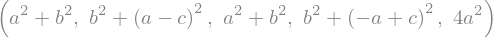

In [56]:
L2_UO_ur_0 = (U_ur_0.T * U_ur_0)[0]
L2_UV_r_0 = ((U_ur_0-V_r_0).T * (U_ur_0-V_r_0))[0]
L2_UO_ul_0 = (U_ul_0.T * U_ul_0)[0]
L2_UV_l_0 = ((U_ul_0-V_l_0).T * (U_ul_0-V_l_0))[0]
L2_UU_0 = ((U_ul_0-U_ur_0).T * (U_ul_0-U_ur_0))[0]
L2_UO_ur_0, L2_UV_r_0, L2_UO_ul_0, L2_UV_l_0, L2_UU_0

And in a general state of folding

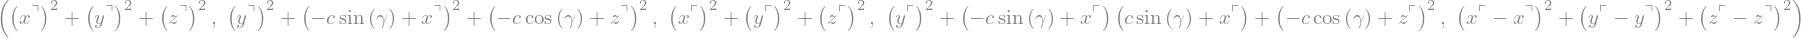

In [57]:
L2_UO_ur_1 = (U_ur_1.T * U_ur_1)[0]
L2_UV_r_1 = ((U_ur_1-V_r_1).T * (U_ur_1-V_r_1))[0]
L2_UO_ul_1 = (U_ul_1.T * U_ul_1)[0]
L2_UV_l_1 = ((U_ul_1-V_r_1).T * (U_ul_1-V_l_1))[0]
L2_UU_1 = ((U_ul_1-U_ur_1).T * (U_ul_1-U_ur_1))[0]
L2_UO_ur_1, L2_UV_r_1, L2_UO_ul_1, L2_UV_l_1, L2_UU_1

In [58]:
Eq_L2_UO_ur = sp.Eq( L2_UO_ur_0, L2_UO_ur_1 ) #
Eq_L2_UV_r = sp.Eq( L2_UV_r_0, L2_UV_r_1 )
Eq_L2_UO_ul = sp.Eq( L2_UO_ul_0, L2_UO_ul_1 ) #
Eq_L2_UV_l = sp.Eq( L2_UV_l_0, L2_UV_l_1 )
Eq_L2_UU = sp.Eq( L2_UU_0, L2_UU_1 ) #

In [59]:
y_ur_sol, z_ur_sol = sp.solve({Eq_L2_UO_ur, Eq_L2_UV_r}, [y_ur, z_ur])[0]
y_ul_sol, z_ul_sol = sp.solve({Eq_L2_UO_ul, Eq_L2_UV_l}, [y_ul, z_ul])[0]

In [60]:
subs_yz_L = {y_ur:y_ur_sol, z_ur:z_ur_sol, y_ul:y_ul_sol, z_ul:z_ul_sol}

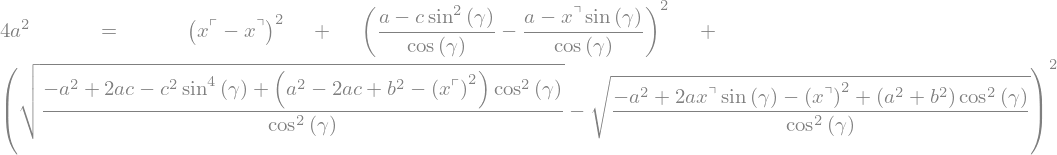

In [61]:
Eq_L2_UU_x = Eq_L2_UU.subs(subs_yz_L)
Eq_L2_UU_x

In [62]:
eta = sp.symbols('eta')

To control the twist of the non-symmetric fold mode of the waterbomb base, let us link $x^\ulcorner$ with 
$x^\urcorner$ by setting
\begin{align}
 x^\ulcorner = - \eta \, x^\urcorner
\end{align}

In [63]:
x_ul_ = - eta * x_ur

Finally, require that the length $|U^{\ulcorner\urcorner}| = 2a$ is equal to the original length
at any state of folding

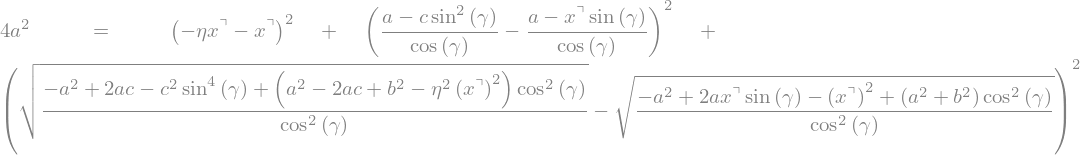

In [64]:
Eq_L2_UU_eta = Eq_L2_UU_x.subs(x_ul, x_ul_)
Eq_L2_UU_eta

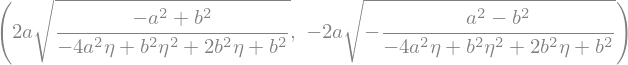

In [65]:
x_ur_sol_1, x_ur_sol_2 = sp.solve(Eq_L2_UU_eta.subs(gamma,0), x_ur)
x_ur_sol_1, x_ur_sol_2

$\eta = 1$ recovers the symmetric case

In [66]:
sp.simplify(x_ur_sol_1.subs(eta,1))